# Unsupervised learning using neural network

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train,_),(x_test,_)=mnist.load_data()

In [0]:
x_train=x_train.astype('float32')/255   #value of pixel reduced to 0-1
x_test=x_test.astype('float32')/255   

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [0]:
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
noise_factor=0.5

x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,
                                                   scale=1.0,
                                                   size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,
                                                   scale=1.0,
                                                   size=x_test.shape)
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

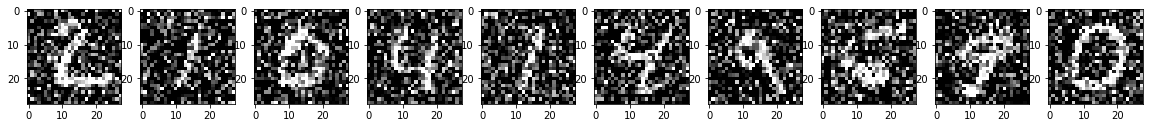

In [0]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    ax=plt.subplot(1,n,i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
plt.show()

In [0]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model

In [0]:
#encoding
input_img=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)  #(28,28,32)
x=MaxPooling2D((2,2))(x)         #(14,14,32)

x=Conv2D(32,(3,3),activation='relu',padding='same')(x)  #(14,14,32)
encoded=MaxPooling2D((2,2))(x) #(7,7,32)

#decoding
x=Conv2D(32,(3,3),activation='relu',padding='same')(encoded)  #(7,7,32)
x=UpSampling2D((2,2))(x)  #(14,14,32)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)  #(14,14,32)
x=UpSampling2D((2,2))(x)   #(28,28,32)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
#(28,28,1)

autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

W0703 14:19:10.619768  7140 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 14:19:11.425770  7140 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 14:19:11.636832  7140 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 14:19:11.935103  7140 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [0]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=128,
               shuffle=True,validation_data=(x_test_noisy,x_test))

W0703 14:19:13.340401  7140 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 278s 5ms/step - loss: 0.1740 - val_loss: 0.1231
Epoch 2/10
60000/60000 [==============================] - 270s 5ms/step - loss: 0.1171 - val_loss: 0.1133
Epoch 3/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.1102 - val_loss: 0.1074
Epoch 4/10
60000/60000 [==============================] - 279s 5ms/step - loss: 0.1067 - val_loss: 0.1029
Epoch 5/10
60000/60000 [==============================] - 300s 5ms/step - loss: 0.1047 - val_loss: 0.1033
Epoch 6/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.1034 - val_loss: 0.1007
Epoch 7/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.1022 - val_loss: 0.1010
Epoch 8/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.1014 - val_loss: 0.1007
Epoch 9/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.1009 - val_loss: 0.1

In [0]:
result = autoencoder.predict(x_test,batch_size=16,verbose=2,steps=None)

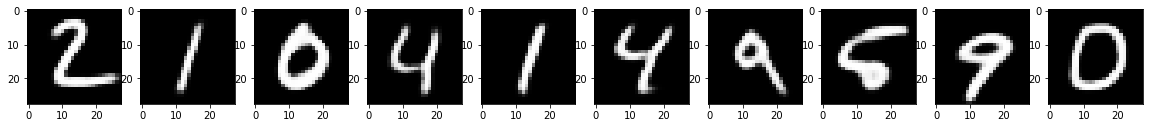

In [0]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    ax=plt.subplot(1,n,i)
    plt.imshow(result[i].reshape(28,28))
    plt.gray()
plt.show()